# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Luqman Hakim
- Email: luqmanxhakim22042002@gmail.com
- Id Dicoding: 2608610

## Persiapan

### Menyiapkan library yang dibutuhkan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

### Menyiapkan data yang akan diguankan

In [38]:
df = pd.read_csv("./data.csv", sep=";")

## Data Understanding

Dataset ini berisi berbagai informasi terkait mahasiswa, dengan total kolom yang merepresentasikan aspek demografis, akademik, administratif, serta latar belakang keluarga. Berikut adalah beberapa kategori utama berdasarkan nama kolom pada dataset:

- Informasi Pribadi Mahasiswa

    - Marital status, Gender, Age at enrollment, Nacionality, International, Displaced, Educational special needs.

- Latar Belakang Pendidikan & Aplikasi

    - Application mode, Application order, Previous qualification, Previous qualification (grade), Admission grade.

- Informasi Akademik Saat Ini

    - Course, Daytime/evening attendance, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved).

- Status Finansial dan Administratif

    - Debtor, Tuition fees up to date, Scholarship holder.

- Latar Belakang Keluarga

    - Mother's qualification, Father's qualification, Mother's occupation, Father's occupation.

Kolom-kolom ini akan menjadi dasar dalam proses eksplorasi dan analisis selanjutnya.

menampilkan 5 baris pertama dari dataframe

In [39]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


menampilkan jumlah baris dan kolom dataframe

In [40]:
df.shape

(4424, 37)

menampilkan tipe data dari variabel dataframe

In [41]:
df.dtypes

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

menampilkan deskriptif dari dataframe

In [42]:
df.describe(include='object')

,Status
count,4424
unique,3
top,Graduate
freq,2209


In [43]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


menampilkan jumlat data duplikat

In [44]:
df.duplicated().sum()

0

menampilkan missing value

In [45]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


## Data Preparation / Preprocessing

### Exploratory Data Analysis (EDA)

menampilkan nilai dari kolom "Status"

In [46]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [47]:
df = df[df.Status!='Enrolled']

menampilkan distribusi kolom "Status" dalam visualisasi pie chart

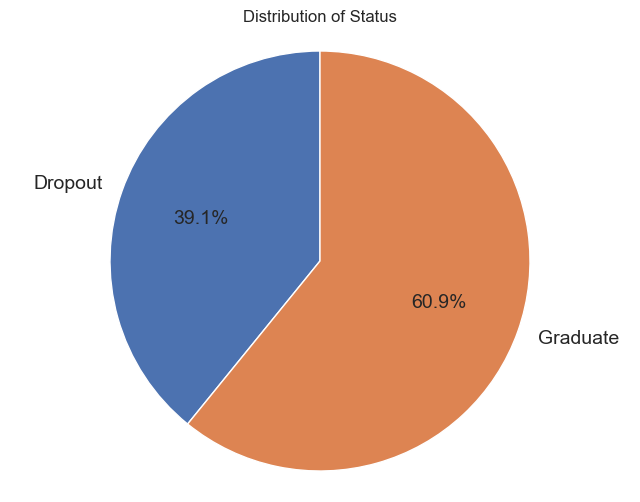

In [48]:
# Menghitung jumlah setiap kategori Status
labels, sizes = np.unique(df['Status'], return_counts=True)

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Distribution of Status')
ax.axis('equal')
plt.show()


mengubah nilai kolom "Status" menjadi numerik

In [49]:
df['Status'] = df['Status'].replace({'Dropout': 0, 'Graduate': 1})

C:\Users\HP\AppData\Local\Temp\ipykernel_14940\2928264446.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status'] = df['Status'].replace({'Dropout': 0, 'Graduate': 1})


menampilkan korelasi dalam bentuk heatmap

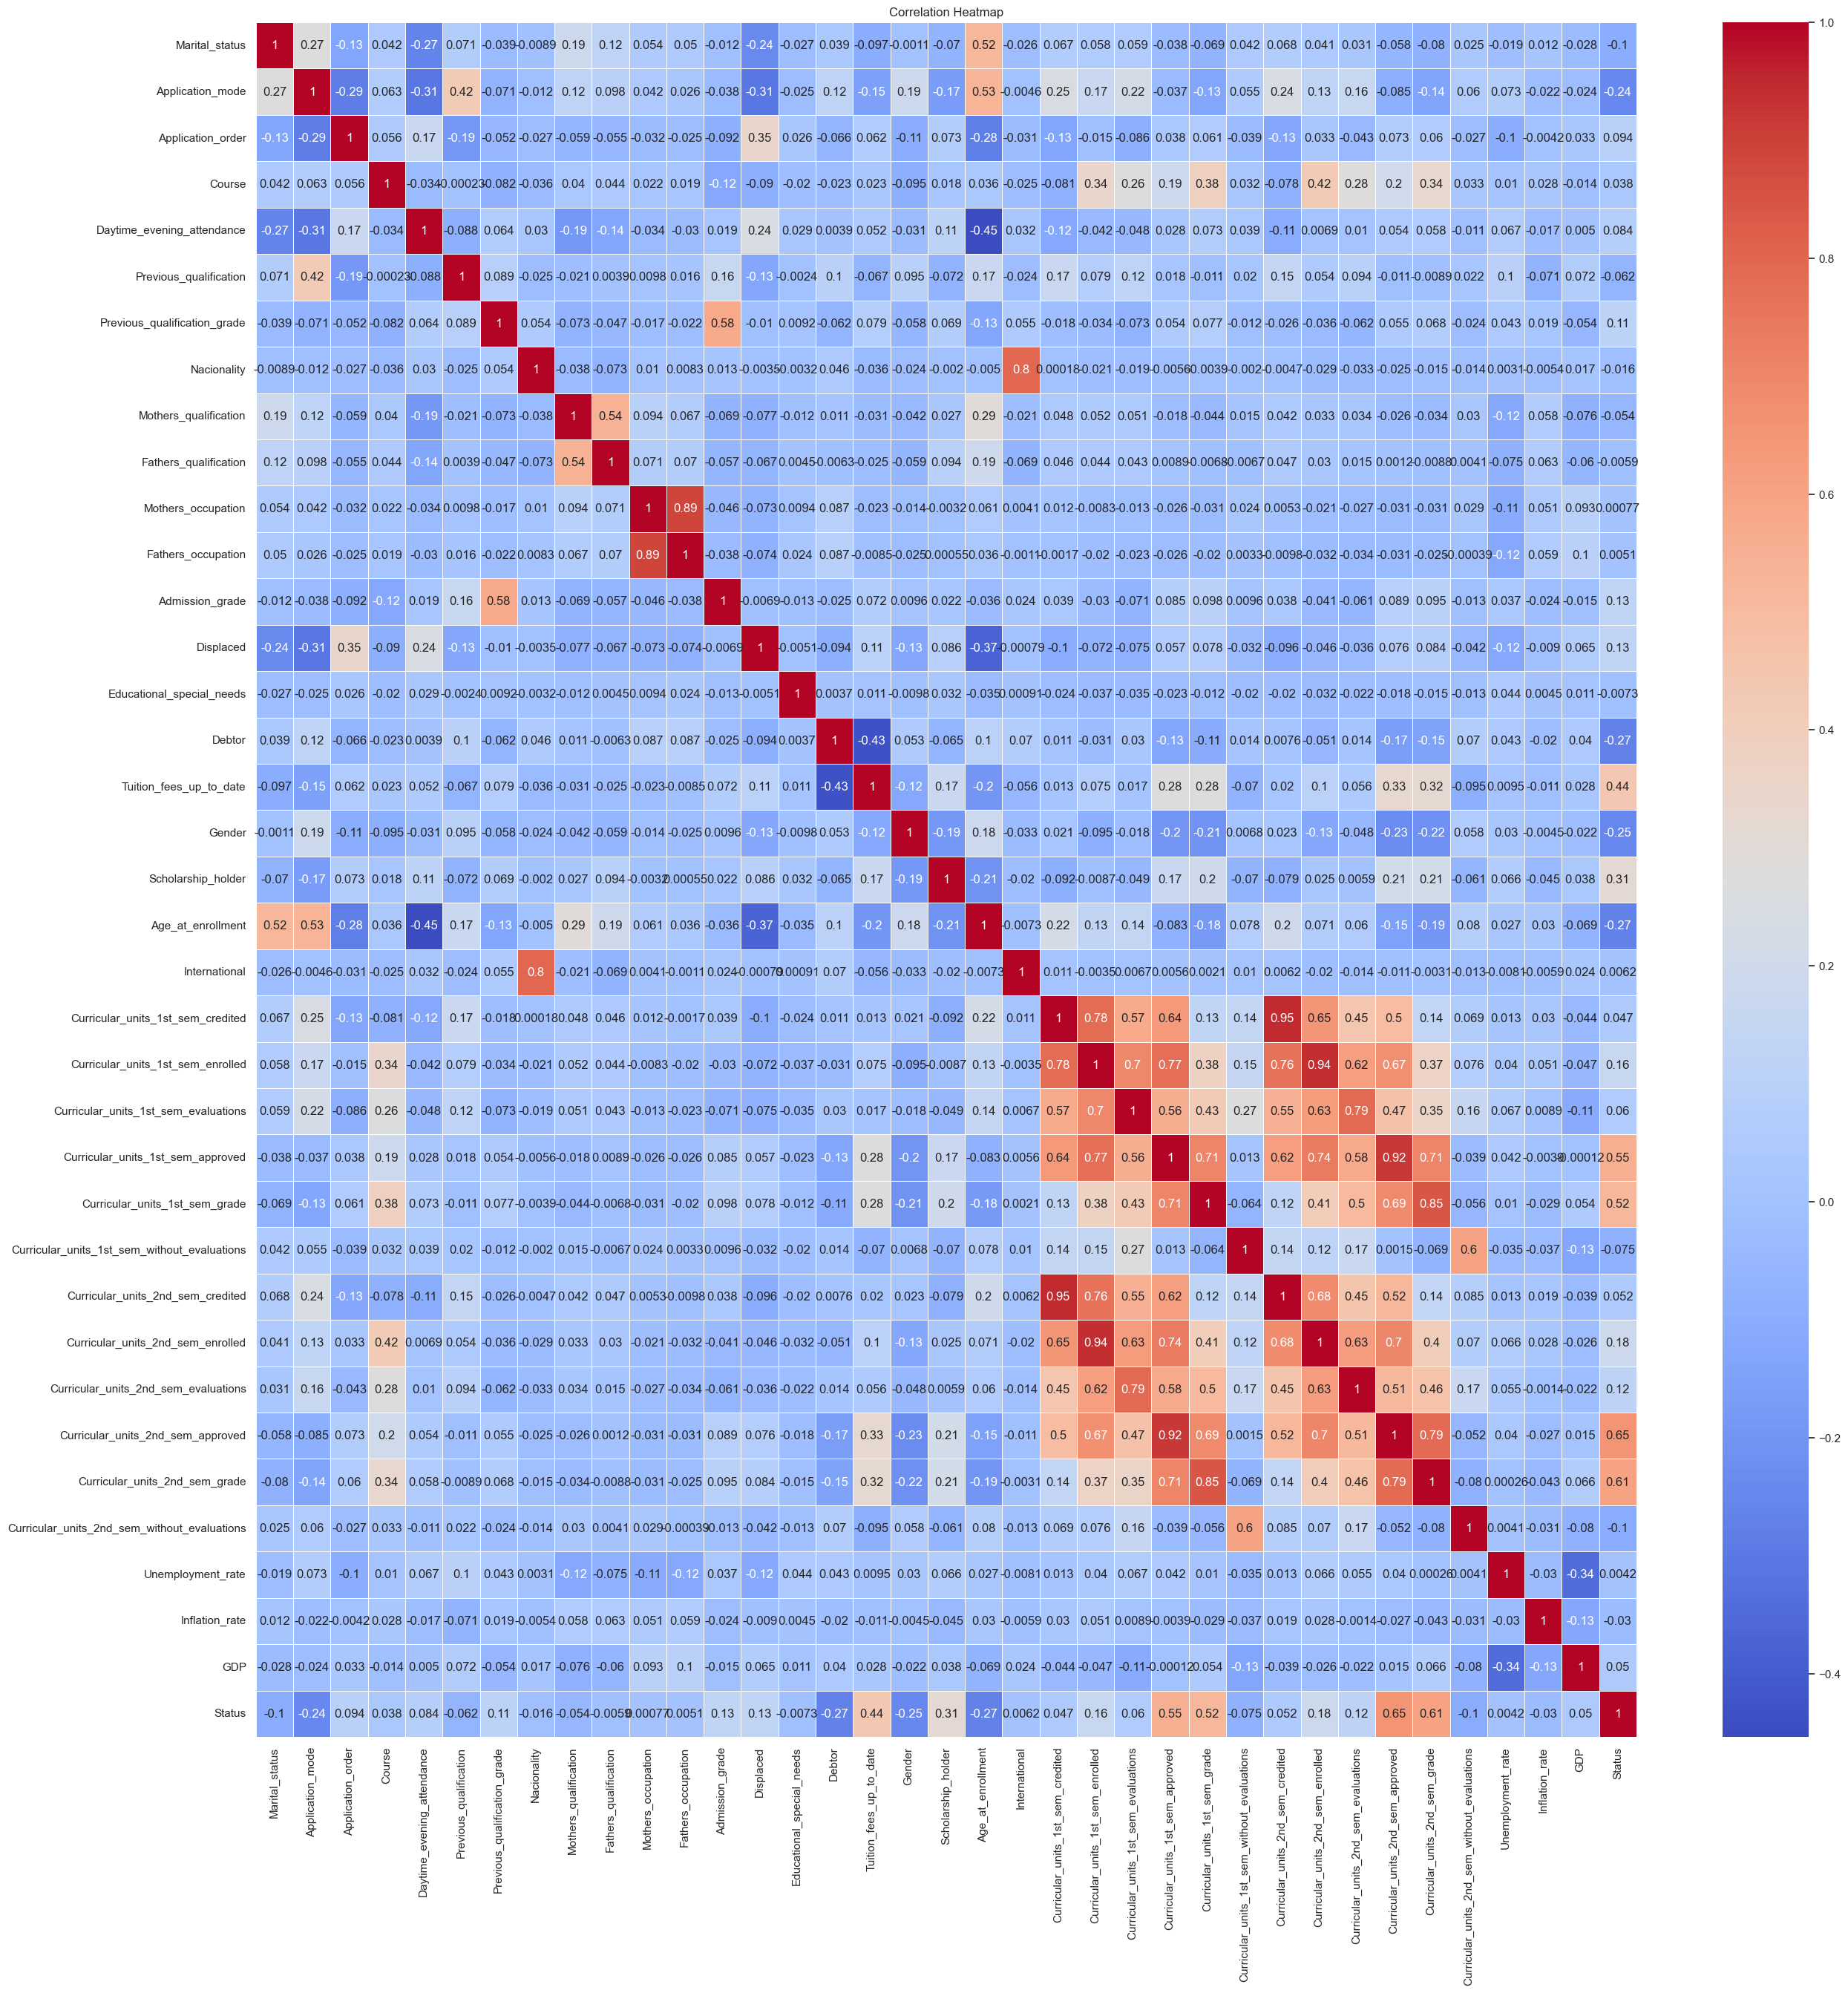

In [50]:
sns.set(style='white')
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

menampilkan korelasi antara "Status" dan variabel lainnya

In [51]:
df.corr()['Status']

Marital_status                                 -0.100479
Application_mode                               -0.244507
Application_order                               0.094355
Course                                          0.038135
Daytime_evening_attendance                      0.084496
Previous_qualification                         -0.062323
Previous_qualification_grade                    0.109464
Nacionality                                    -0.015516
Mothers_qualification                          -0.053989
Fathers_qualification                          -0.005865
Mothers_occupation                              0.000772
Fathers_occupation                              0.005066
Admission_grade                                 0.128058
Displaced                                       0.126113
Educational_special_needs                      -0.007254
Debtor                                         -0.267207
Tuition_fees_up_to_date                         0.442138
Gender                         

Menghapus variabel yang memiliki korelasi kecil dengan "Status" karena dianggap tidak relevan untuk proses pelatihan model.

In [52]:
df.drop(columns=['Marital_status',
                          'Age_at_enrollment',
                          'Application_mode',
                          'Application_order',
                          'Course',
                          'Previous_qualification',
                          'Nacionality',
                          'Mothers_qualification',
                          'Fathers_qualification',
                          'Mothers_occupation',
                          'Fathers_occupation',
                          'Educational_special_needs',
                          'International',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Unemployment_rate',
                          'Inflation_rate',
                          'GDP'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daytime_evening_attendance         3630 non-null   int64  
 1   Previous_qualification_grade       3630 non-null   float64
 2   Admission_grade                    3630 non-null   float64
 3   Displaced                          3630 non-null   int64  
 4   Debtor                             3630 non-null   int64  
 5   Tuition_fees_up_to_date            3630 non-null   int64  
 6   Gender                             3630 non-null   int64  
 7   Scholarship_holder                 3630 non-null   int64  
 8   Curricular_units_1st_sem_credited  3630 non-null   int64  
 9   Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 10  Curricular_units_1st_sem_approved  3630 non-null   int64  
 11  Curricular_units_1st_sem_grade     3630 non-null   float64
 1

memvisualisasikan korelasi antara "Status" dan variabel lainnya menggunakan diagram batang yang disusun dari nilai korelasi tertinggi ke terendah

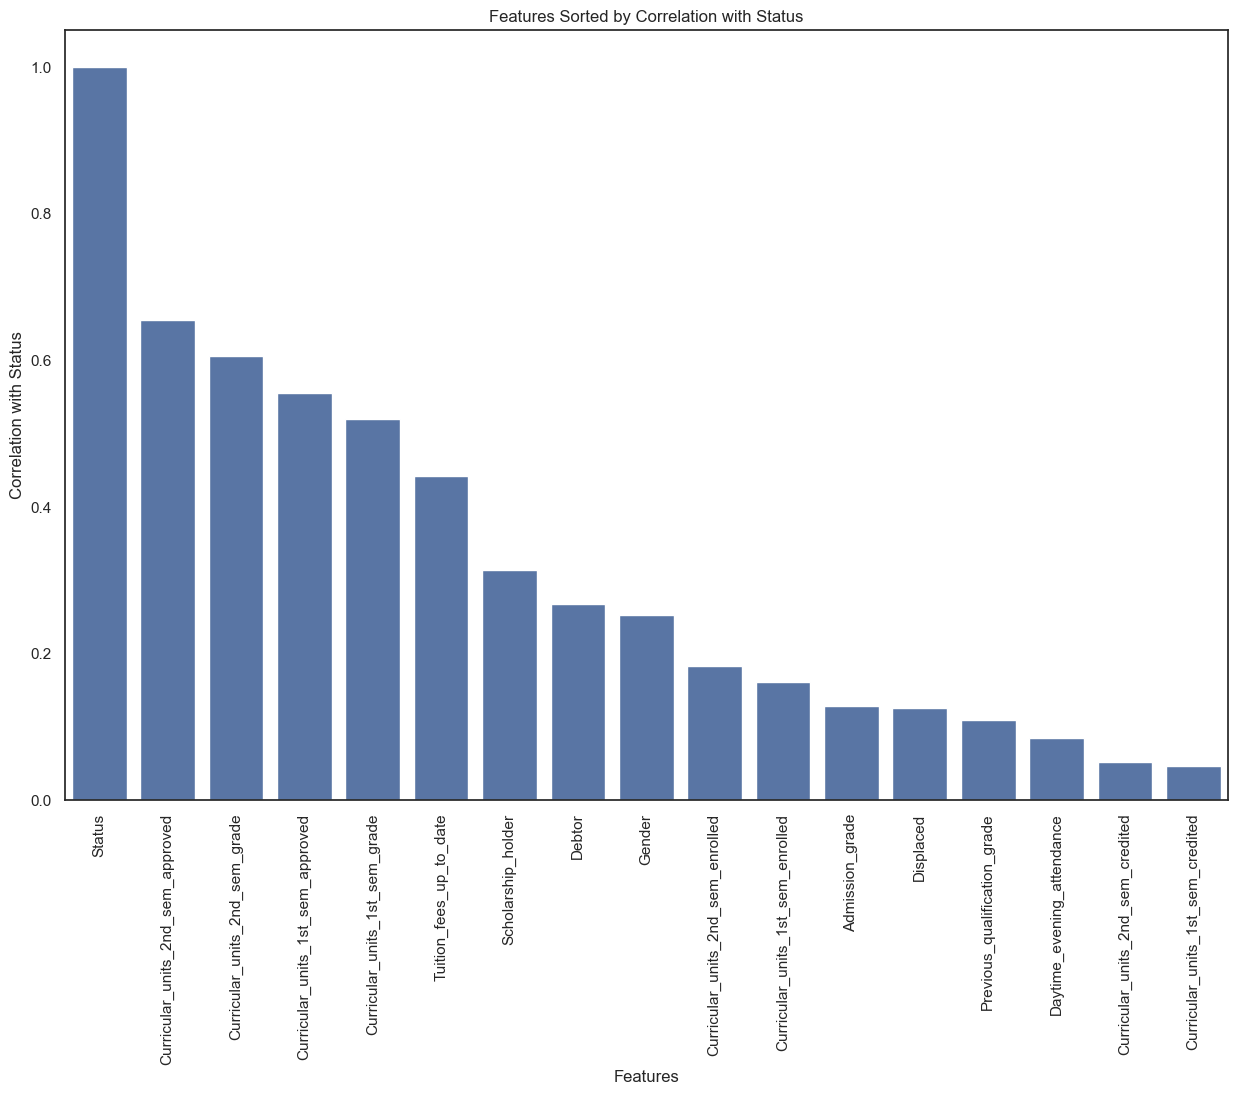

In [53]:
correlations = df.corr()['Status'].abs().sort_values(ascending=False).reset_index()
correlations.columns = ['Feature', 'Correlation']

plt.figure(figsize=(15, 10))
sns.barplot(data=correlations, x='Feature', y='Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.title('Features Sorted by Correlation with Status')
plt.xticks(rotation=90)
plt.show()


Melakukan konversi data pada sejumlah variabel dari tipe numerik ke format string (kategori).

In [54]:
df['Gender'] = df['Gender'].astype(str).replace({'0': 'Male', '1': 'Female'})
df['Displaced'] = df['Displaced'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Debtor'] = df['Debtor'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Scholarship_holder'] = df['Scholarship_holder'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].astype(str).replace({'0': 'Evening', '1': 'Daytime'})
df['Status'] = df['Status'].astype(str).replace({'0': 'Dropout', '1': 'Graduate'})

menampilkan korelasi antara variabel "Status" dan sejumlah variabel lain melalui visualisasi subplot secara bersamaan.

C:\Users\HP\AppData\Local\Temp\ipykernel_14940\3012574918.py:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_14940\3012574918.py:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_14940\3012574918.py:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_14940\3012574918.py:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_14940\3012574918.py:22: UserWar

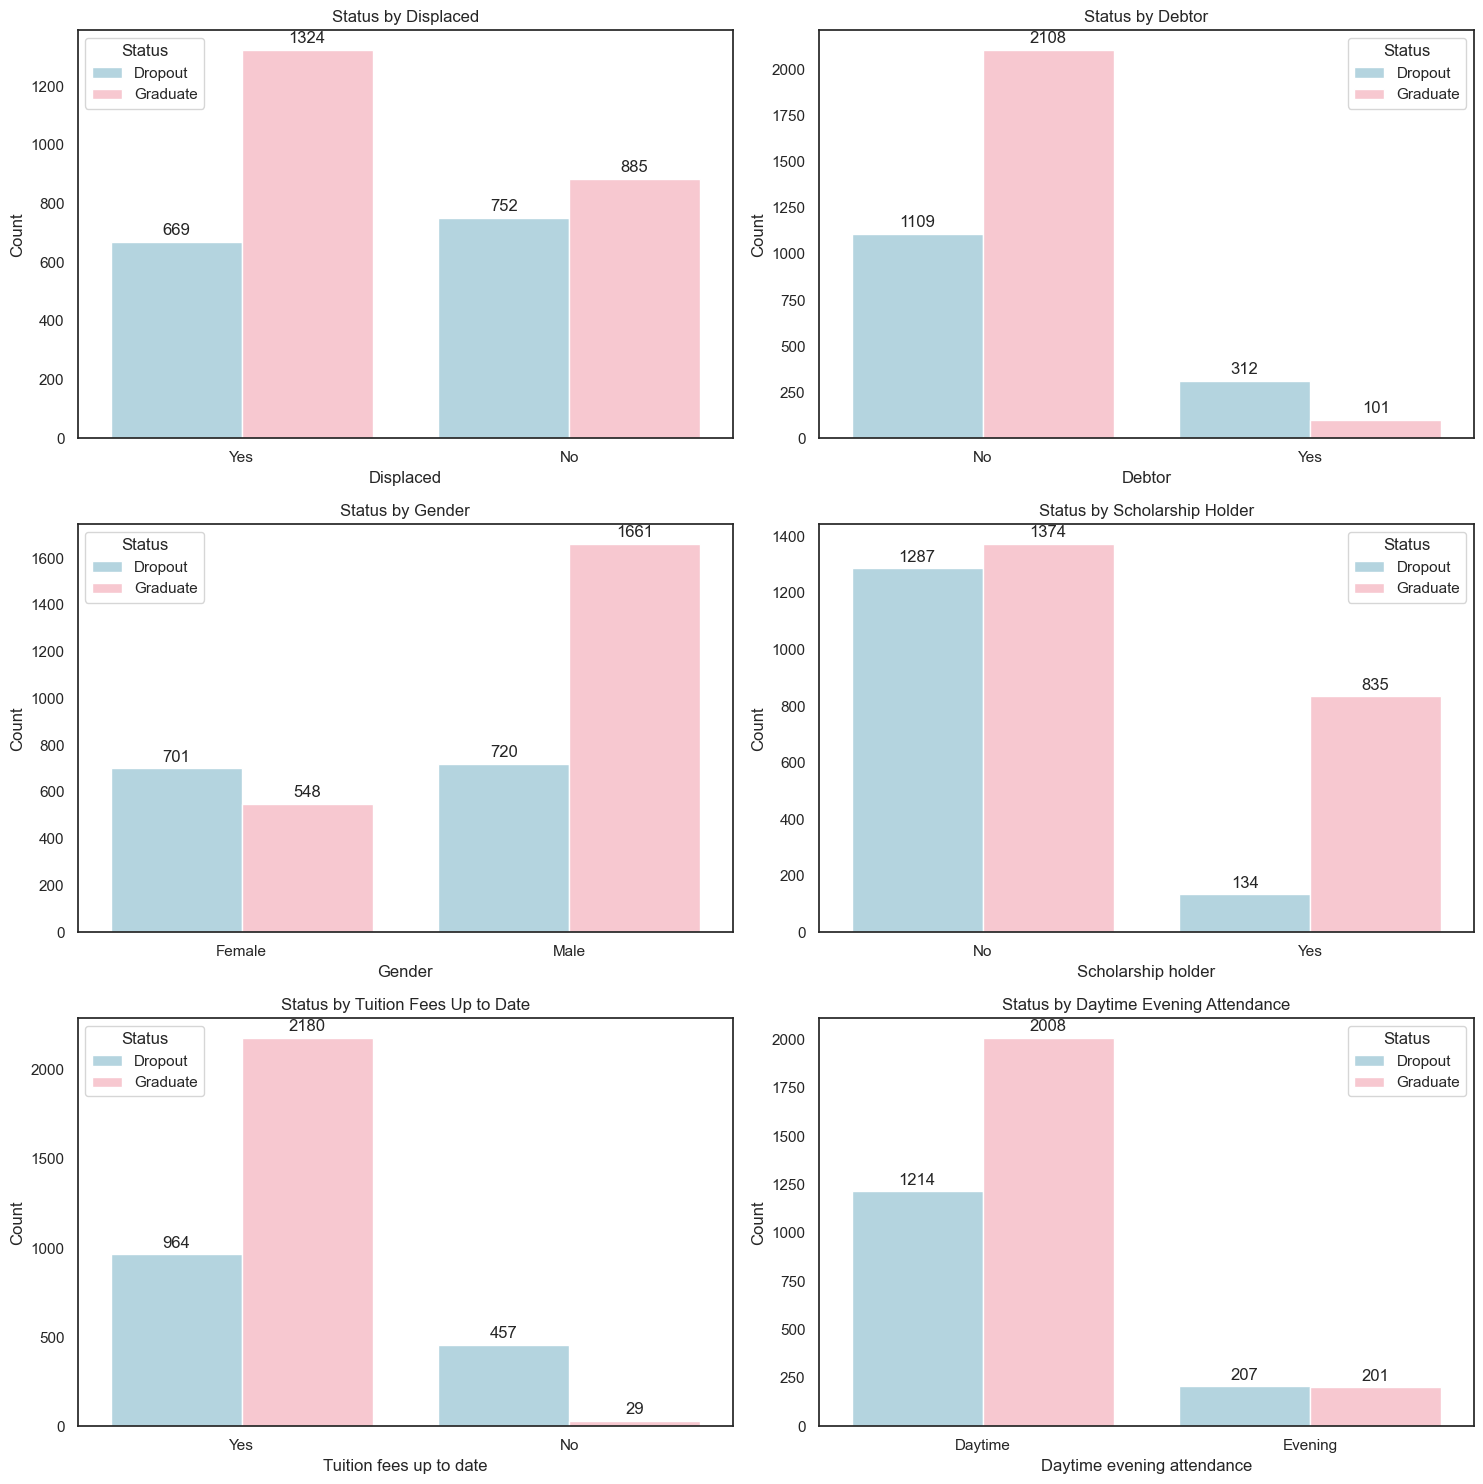

In [55]:
# Define color palette and plot settings
colors = ['lightblue', 'pink', 'lightgreen']
categorical_features = [
    'Displaced', 'Debtor', 'Gender',
    'Scholarship_holder', 'Tuition_fees_up_to_date',
    'Daytime_evening_attendance'
]
titles = [
    'Status by Displaced',
    'Status by Debtor',
    'Status by Gender',
    'Status by Scholarship Holder',
    'Status by Tuition Fees Up to Date',
    'Status by Daytime Evening Attendance'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through features and axes
for i, (feature, ax) in enumerate(zip(categorical_features, axes)):
    sns.countplot(x=feature, hue='Status', data=df, palette=colors, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(feature.replace('_', ' '))
    ax.set_ylabel('Count')
    ax.legend(title='Status', loc='upper left' if i % 2 == 0 else 'upper right', labels=['Dropout', 'Graduate'])

    # Add annotations
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(str(int(p.get_height())),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

## Modeling

filter variable kategori

In [56]:
category_cols = df.select_dtypes(include='object')
category_cols.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Status
0,Daytime,Yes,No,Yes,Female,No,Dropout
1,Daytime,Yes,No,No,Female,No,Graduate
2,Daytime,Yes,No,No,Female,No,Dropout
3,Daytime,Yes,No,Yes,Male,No,Graduate
4,Evening,No,No,Yes,Male,No,Graduate


pembuatan direktori "model"

melakukan label encoding variable kategori

In [57]:
features_to_encode = [
    'Daytime_evening_attendance', 'Displaced', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder'
]

# Dictionary untuk menyimpan encoder per kolom
encoders = {}

# Encode dan simpan encoder masing-masing
for feature in features_to_encode:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    joblib.dump(le, f"model/encoder_{feature}.joblib")
    encoders[feature] = le


melakukan scaling variable numerik

In [58]:
features_to_scale = [
    'Admission_grade', 'Previous_qualification_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_credited',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_credited'
]

# Lakukan scaling dan simpan scaler masing-masing fitur
for feature in features_to_scale:
    scaler = StandardScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    joblib.dump(scaler, f"model/scaler_{feature}.joblib")


split dataset 80:20

In [59]:
X = df.drop(columns='Status').values
y = df['Status'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

(2904, 16)
(726, 16)


encoding variable target

In [60]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
joblib.dump(label_encoder, "model/encoder_target.joblib")

y_test = label_encoder.transform(y_test)

### Model Logistic Regression

In [61]:
# Inisialisasi model terlebih dahulu
logreg_model = LogisticRegression()

# Tetapkan parameter grid
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'C': [0.1, 1, 10, 100],
    'tol': [1e-4, 1e-5, 1e-6],
    'max_iter': [100, 150, 250, 400]
}

# Setup GridSearchCV
logreg_search = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Latih model
logreg_search.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = logreg_search.predict(X_test)

print("Best parameters:", logreg_search.best_params_)
print("The test accuracy score of Logistic Regression is", accuracy_score(y_test, y_pred))

Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 1e-05}
The test accuracy score of Logistic Regression is 0.9077134986225895


### Model Random Forest

In [62]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Grid hyperparameter Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model ke data training
rf_grid_search.fit(X_train, y_train)

# Prediksi hasil dari model terbaik
rf_predictions = rf_grid_search.best_estimator_.predict(X_test)

# Tampilkan parameter terbaik
print("Best parameters:", rf_grid_search.best_params_)

# Hitung dan tampilkan akurasi
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("The test accuracy score of Random Forest Classifier is", rf_accuracy)


Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
The test accuracy score of Random Forest Classifier is 0.8980716253443526


### Model Decision Tree

In [63]:
# Buat instance DecisionTree
dt_model = DecisionTreeClassifier()

# Tentukan kombinasi hyperparameter
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 20, 30],
    'min_samples_leaf': [1, 10, 100]
}

# GridSearchCV setup
grid_search_dt = GridSearchCV(
    dt_model,
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Latih model
grid_search_dt.fit(X_train, y_train)

# Prediksi dengan model terbaik
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# Output parameter terbaik
print("Best parameters:", grid_search_dt.best_params_)

# Hitung dan tampilkan akurasi
dt_acc = accuracy_score(y_test, y_pred_dt)
print("The test accuracy score of Decision Tree Classifier is", dt_acc)


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
The test accuracy score of Decision Tree Classifier is 0.8801652892561983


### Model Gradient Boosting

In [64]:
# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier()

# Daftar hyperparameter untuk pencarian grid
grid_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Konfigurasi pencarian grid
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=grid_params,
    scoring='accuracy',
    cv=5
)

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Prediksi hasil
gb_preds = grid_search.best_estimator_.predict(X_test)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)

# Tampilkan akurasi
gb_accuracy = accuracy_score(y_test, gb_preds)
print("The test accuracy score of Gradient Boosting Classifier is", gb_accuracy)


Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
The test accuracy score of Gradient Boosting Classifier is 0.8911845730027548


## Evaluation

### Logistic Regression

In [65]:
# Hitung confusion matrix
cm_lr = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Tampilkan hasil
print("Confusion Matrix of Logistic Regression:")
for row in cm_lr:
    print(row)

Confusion Matrix of Logistic Regression:
[226  51]
[ 16 433]


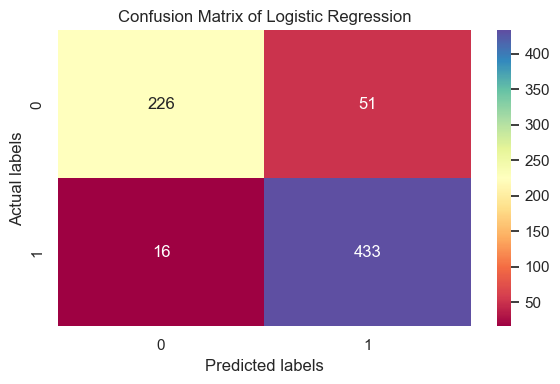

In [66]:
# Ukuran plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot heatmap
heatmap = sns.heatmap(data=cm_lr, annot=True, cmap='Spectral', fmt='g', ax=ax)

# Label sumbu dan judul
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Logistic Regression')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [67]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       277
           1       0.89      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



Random Forest

In [68]:
# Menghitung confusion matrix dengan argumen eksplisit
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Menampilkan hasil
print("Confusion Matrix of Random Forest Classifier:")
[print(row) for row in conf_matrix_rf]


Confusion Matrix of Random Forest Classifier:
[226  51]
[ 16 433]


[None, None]

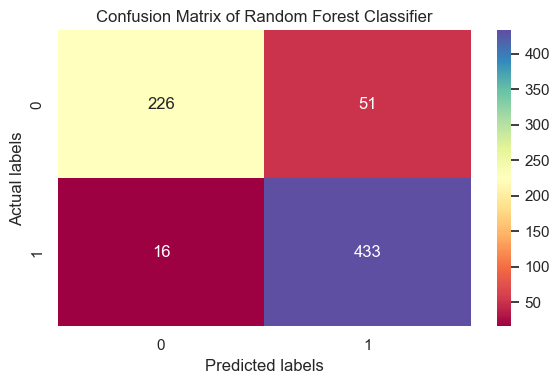

In [69]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, ax=ax, annot=True, fmt='g', cmap='Spectral')
ax.set(xlabel='Predicted labels',
       ylabel='Actual labels',
       title='Confusion Matrix of Random Forest Classifier')
plt.tight_layout()
plt.show()


In [70]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       277
           1       0.89      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



Decision Tree

In [71]:
# Membuat confusion matrix dan menampilkannya
dt_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Decision Tree Classifier:")
for row in dt_conf_matrix:
    print(row)

Confusion Matrix of Decision Tree Classifier:
[226  51]
[ 16 433]


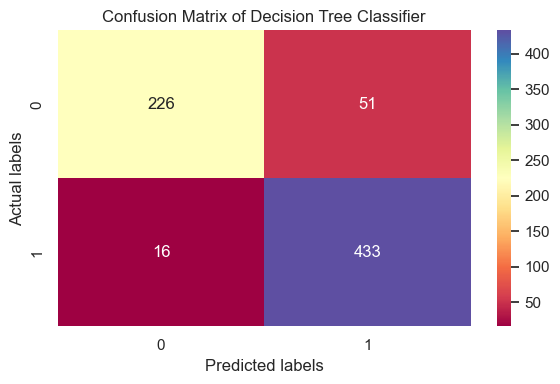

In [72]:
fig = plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(data=dt_conf_matrix, annot=True, fmt='g', cmap='Spectral')
heatmap.set_xlabel('Predicted labels')
heatmap.set_ylabel('Actual labels')
heatmap.set_title('Confusion Matrix of Decision Tree Classifier')
plt.tight_layout()
plt.show()

In [73]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       277
           1       0.89      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



Gradient Boosting

In [74]:
gb_conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix of Gradient Boosting Classifier:")
[print(row) for row in gb_conf_matrix]

Confusion Matrix of Gradient Boosting Classifier:
[226  51]
[ 16 433]


[None, None]

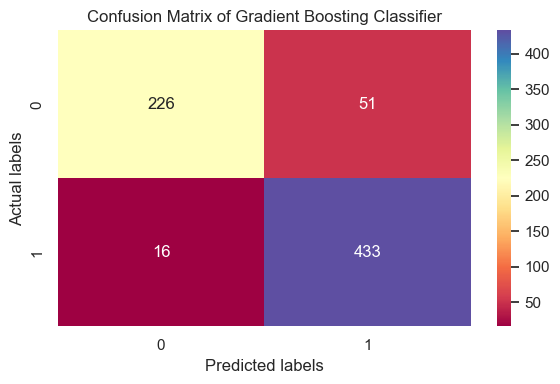

In [75]:
fig = plt.figure(figsize=(6, 4))
ax = sns.heatmap(gb_conf_matrix, annot=True, cmap='Spectral', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

In [76]:
print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       277
           1       0.89      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



## Deployment

Save model logistic regression

In [77]:
joblib.dump(logreg_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [78]:
# Load model
loaded_model = joblib.load("logistic_regression_model.joblib")

# Save the loaded model
joblib.dump(loaded_model, "logistic_regression_best_model.joblib")

['logistic_regression_best_model.joblib']